In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

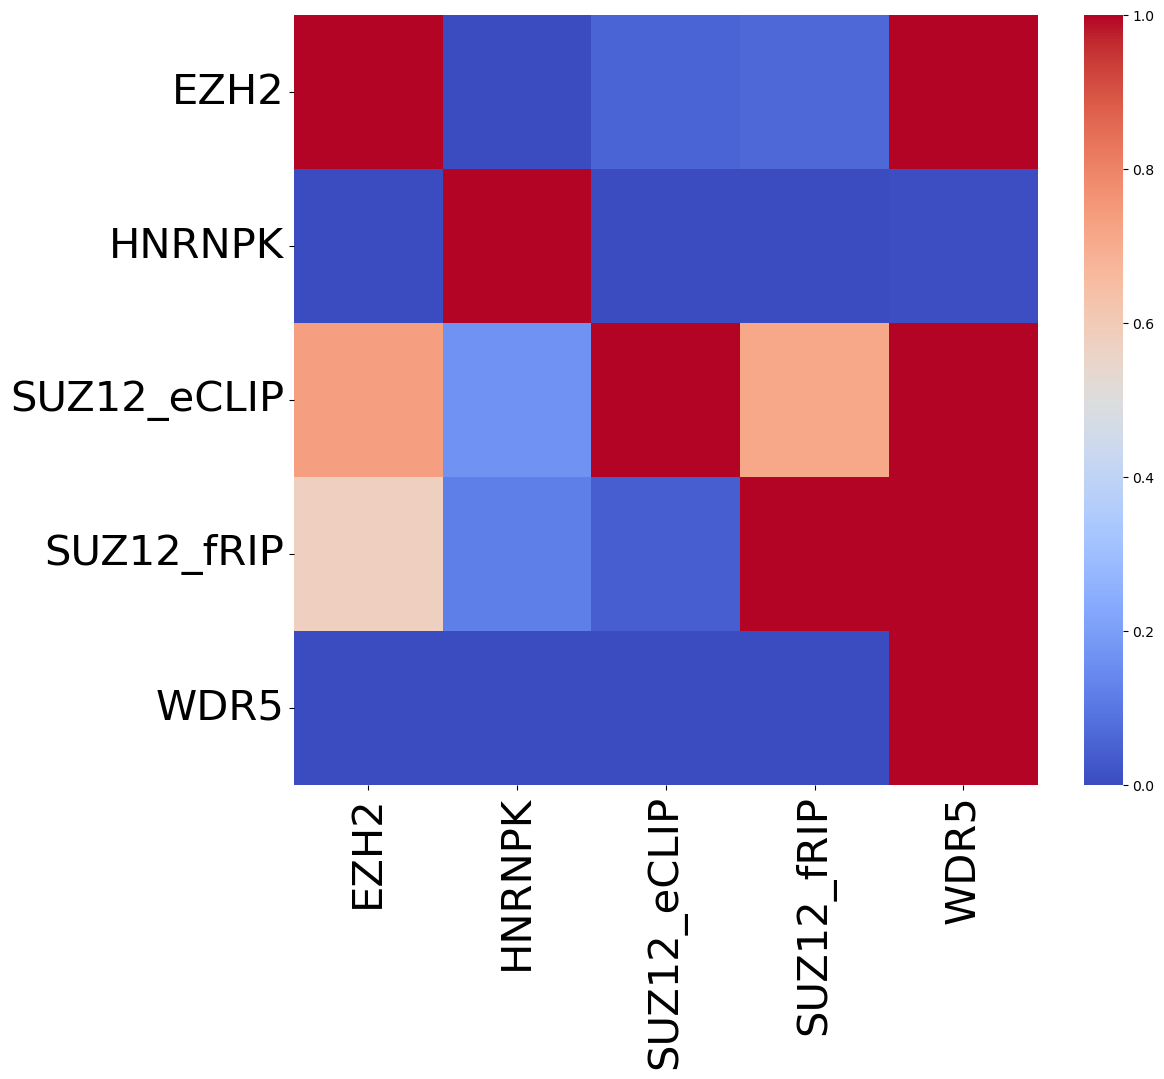

In [3]:
plt.figure(figsize=(12,10))
fa = pd.read_table("inters_2FA.tsv").rename(columns={"Unnamed: 0": ""}).set_index("").astype(float)
fa["divider"] = [23981, 1585, 331555, 268887, 423]
fa = fa.iloc[:, :-1].div(fa.iloc[:, -1])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(fa, cmap='coolwarm', annot_kws={"size": 5}, vmax=1)
plt.savefig("contacts_2fa.svg", transparent=True)
fa.to_csv("2fa_conts.tsv", sep='\t', header=True, index=True)

In [4]:
fa

,EZH2,HNRNPK,SUZ12_eCLIP,SUZ12_fRIP,WDR5
,,,,,
EZH2,1.000000,0.000000,0.056163,0.063432,6.801418
HNRNPK,0.000000,1.000000,0.000673,0.000707,0.004728
SUZ12_eCLIP,0.736041,0.165300,1.000000,0.713646,6.226950
SUZ12_fRIP,0.581460,0.117350,0.042056,1.000000,4.796690
WDR5,0.001293,0.001262,0.000220,0.000257,1.000000


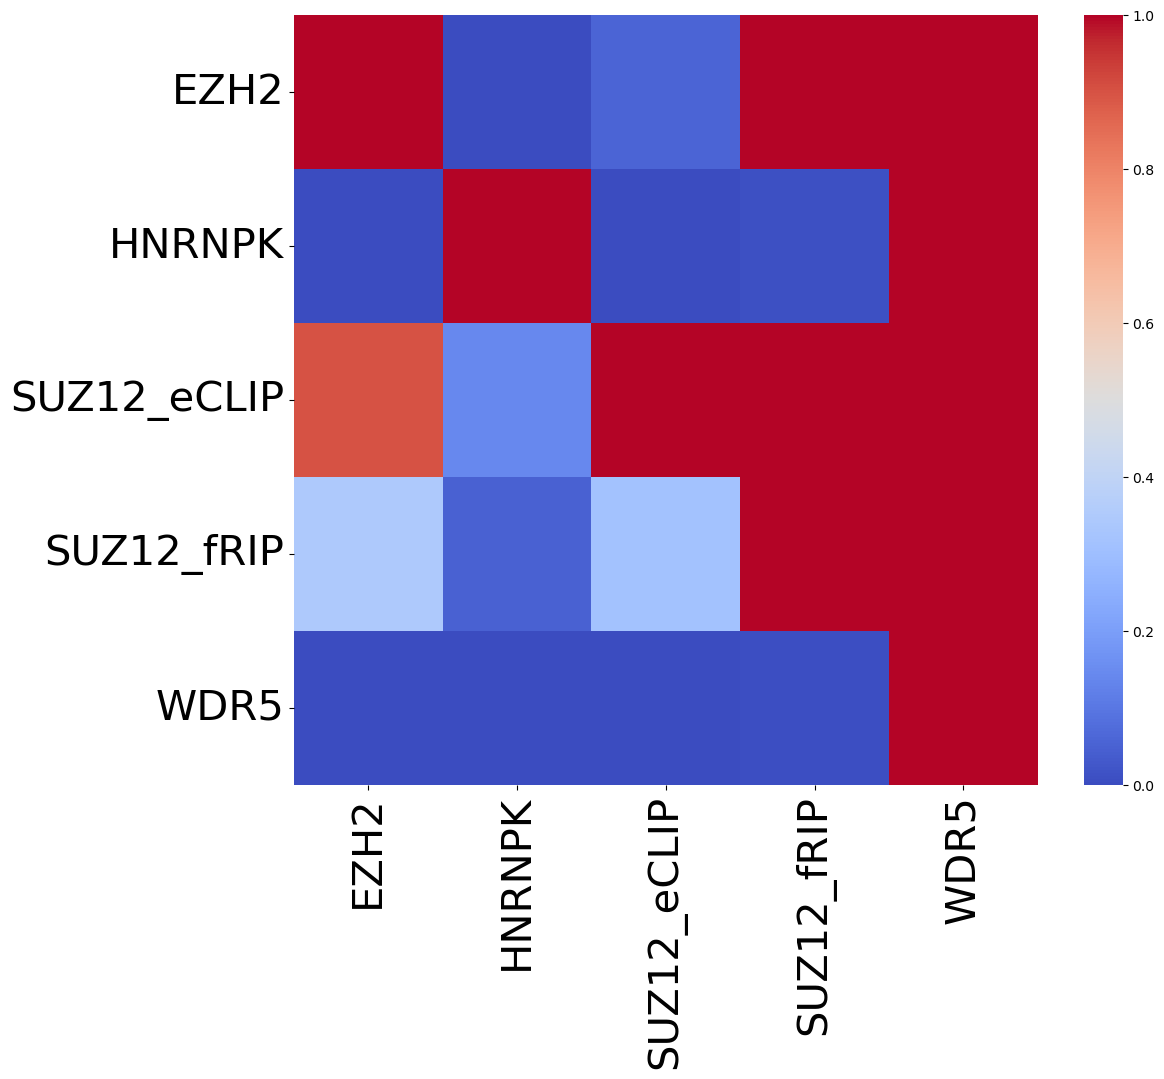

In [4]:
plt.figure(figsize=(12,10))
fa = pd.read_table("inters_NPM.tsv").rename(columns={"Unnamed: 0": ""}).set_index("")
fa["divider"] = [38893, 2955, 636825, 20890, 498]
fa = fa.iloc[:, :-1].div(fa.iloc[:, -1])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(fa, cmap='coolwarm', annot_kws={"size": 5}, vmax=1)
plt.savefig("contacts_NPM.svg", transparent=True)
fa.to_csv("npm_conts.tsv", sep='\t', header=True, index=True)

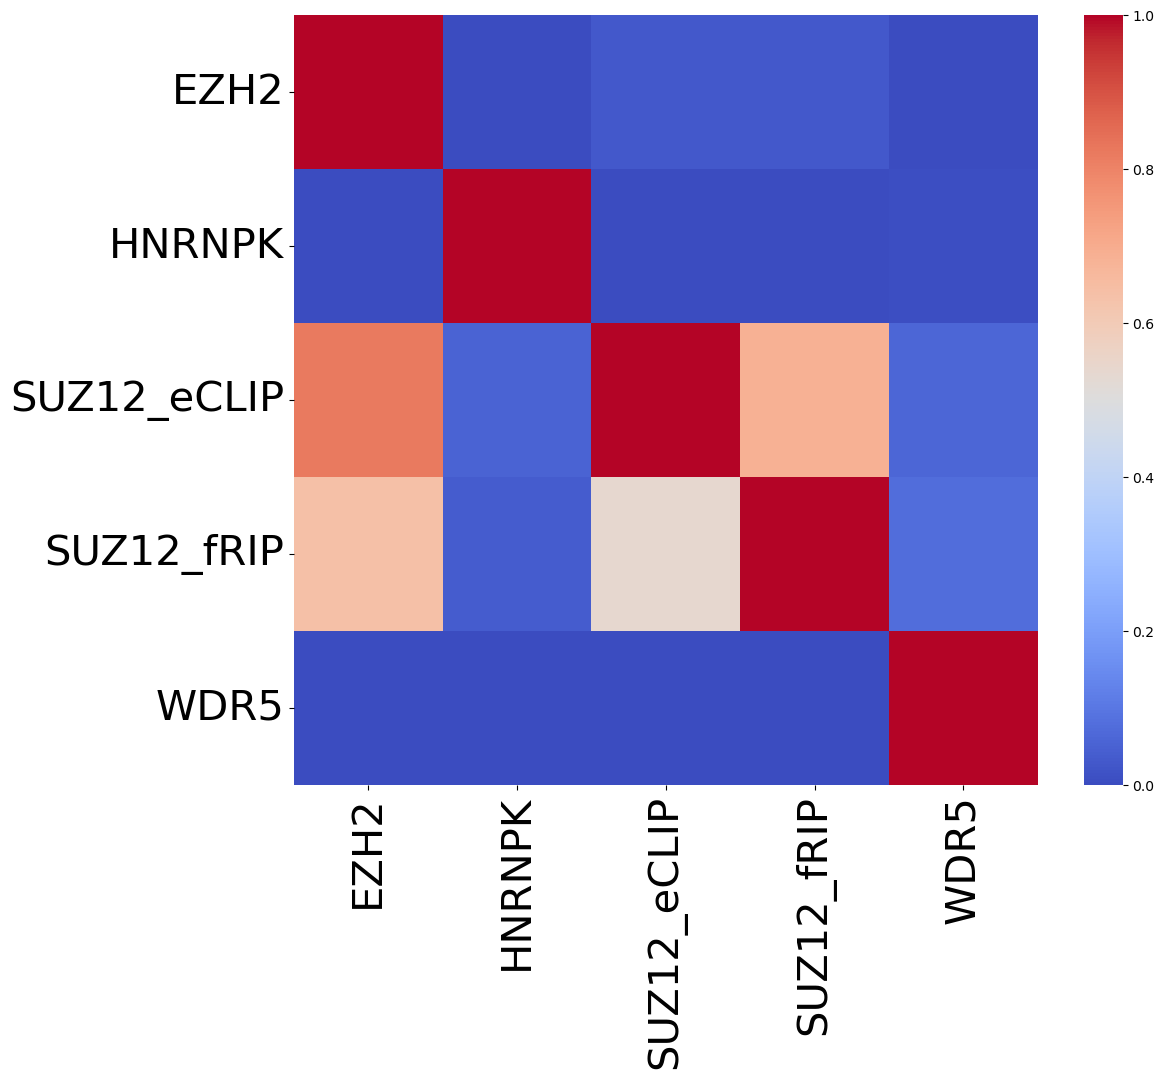

In [5]:
plt.figure(figsize=(12,10))
fa = pd.read_table("inters_2FA_clean.tsv").rename(columns={"Unnamed: 0": ""}).set_index("")
fa["divider"] = [8206, 837, 218634, 176773, 333]
fa = fa.iloc[:, :-1].div(fa.iloc[:, -1])
fa
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(fa, cmap='coolwarm', annot_kws={"size": 5}, vmax=1)
plt.savefig("contacts_2fa_no_npm.svg", transparent=True)
fa.to_csv("clean_conts.tsv", sep='\t', header=True, index=True)

('EZH2', before    4.379867
after     3.914132
Name: EZH2, dtype: float64)
('HNRNPK', before    3.200029
after     2.922725
Name: HNRNPK, dtype: float64)
('SUZ12_eCLIP', before    5.520556
after     5.339718
Name: SUZ12_eCLIP, dtype: float64)
('SUZ12_fRIP', before    5.429570
after     5.247416
Name: SUZ12_fRIP, dtype: float64)
('WDR5', before    2.626340
after     2.522444
Name: WDR5, dtype: float64)


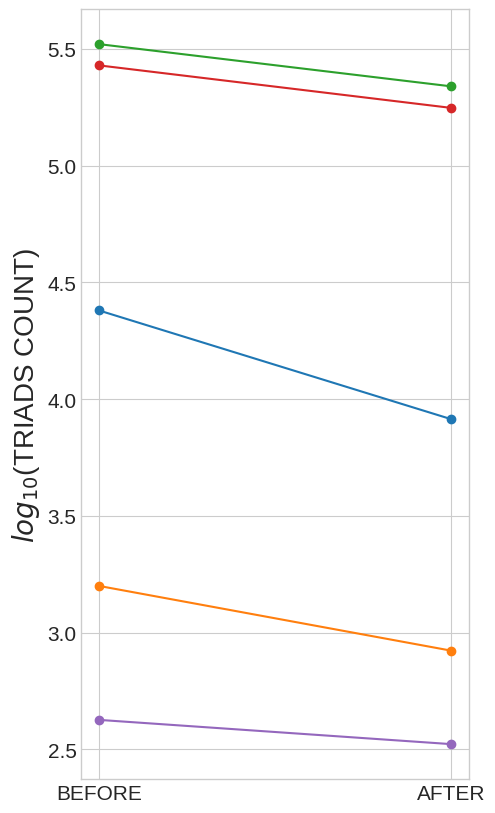

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(5, 10))
dt= {"EZH2":{"before":23981, "after":8206},
     "HNRNPK":{"before":1585, "after":837},
     "SUZ12_eCLIP":{"before":331555, "after":218634},
     "SUZ12_fRIP":{"before":268887, "after":176773},
     "WDR5":{"before":423, "after":333}}

df = pd.DataFrame(dt).transpose().apply(np.log10)

for row in df.iterrows():
    plt.plot(("BEFORE", "AFTER"), (row[1]["before"], row[1]["after"]), '-o')
    print(row)
plt.ylabel("$log_{10}$(TRIADS COUNT)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("desat_radicl.svg", transparent=True)

In [29]:
def draw_hm(fname):
    plt.figure(figsize=(12,10))
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    dt = dict()

    with open(f"{fname}", 'r') as fin:
        for line in fin:
            line = line.strip().split('\t')
            dt[(line[0], line[1])] = float(line[-1])
            dt[(line[1], line[0])] = float(line[-1])
            dt[(line[0], line[0])] = 1
            dt[(line[1], line[1])] = 1

    tmp = (pd.DataFrame
     .from_records([(k[0], k[1], v) for k, v in dt.items()])
     .rename(columns={0:"p1", 1:"p2", 2:"corr"})
     .pivot(index="p1", columns="p2", values="corr")
    )
    tmp.index = pd.CategoricalIndex(tmp.index, categories=["EZH2", "hnRNPK", 
                                                       "SUZ12_eCLIP", "SUZ12_fRIP",
                                                       "WDR5"])
    tmp.sort_index(level=0, inplace=True)

    tmp = tmp.loc[:, ["EZH2", "hnRNPK", "SUZ12_eCLIP", "SUZ12_fRIP", "WDR5"]]
    sns.heatmap(tmp, cmap='coolwarm', annot_kws={"size": 5}, vmin = -1, vmax=1)
    plt.show()

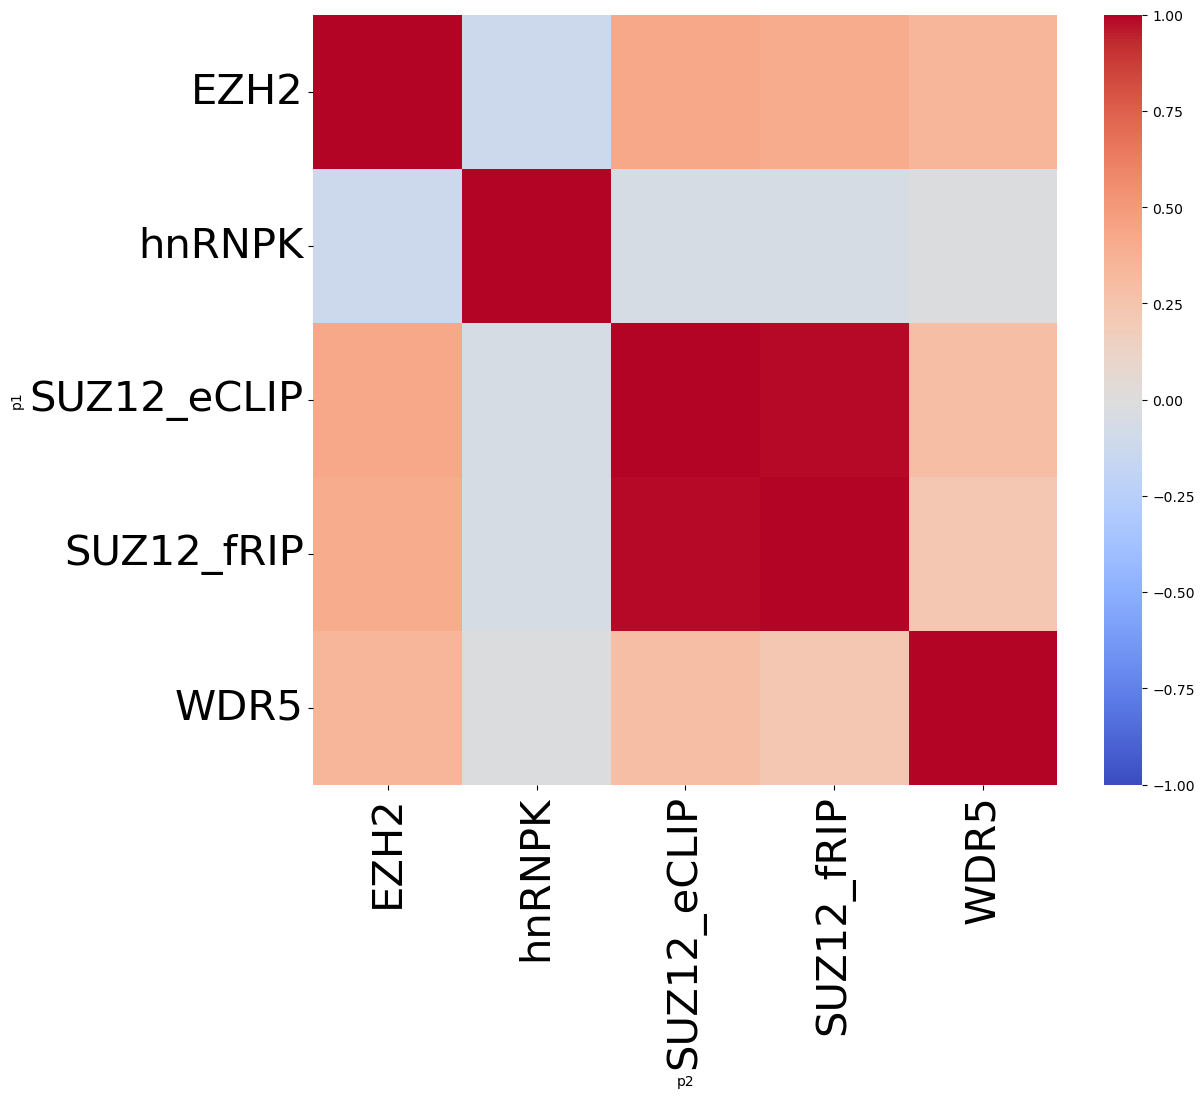

In [30]:
draw_hm("SG_analysis/2fa_corrs.tsv")

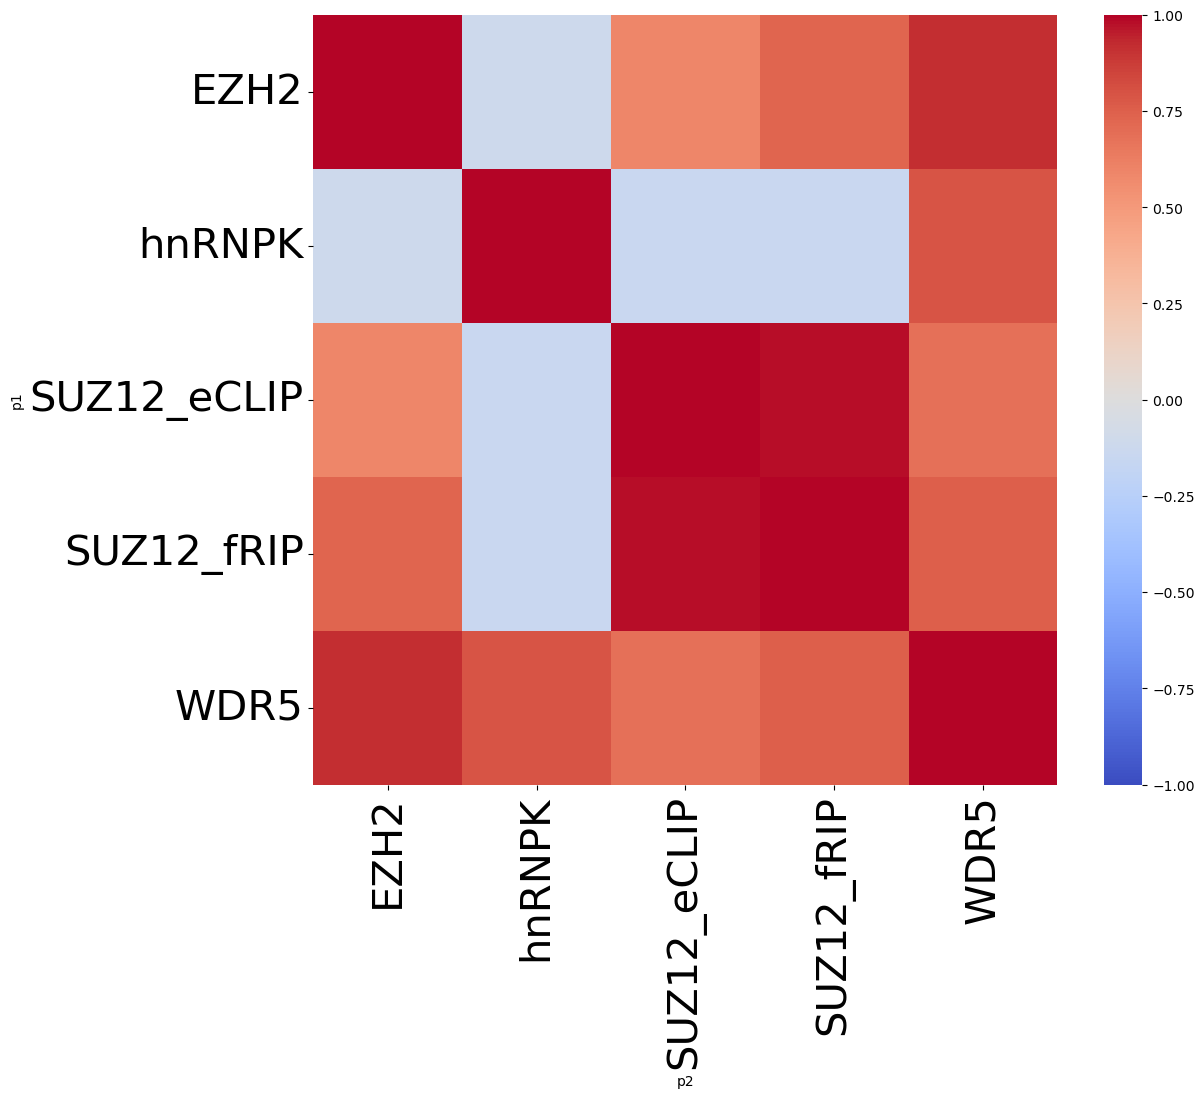

In [31]:
draw_hm("SG_analysis/npm_corrs.tsv")

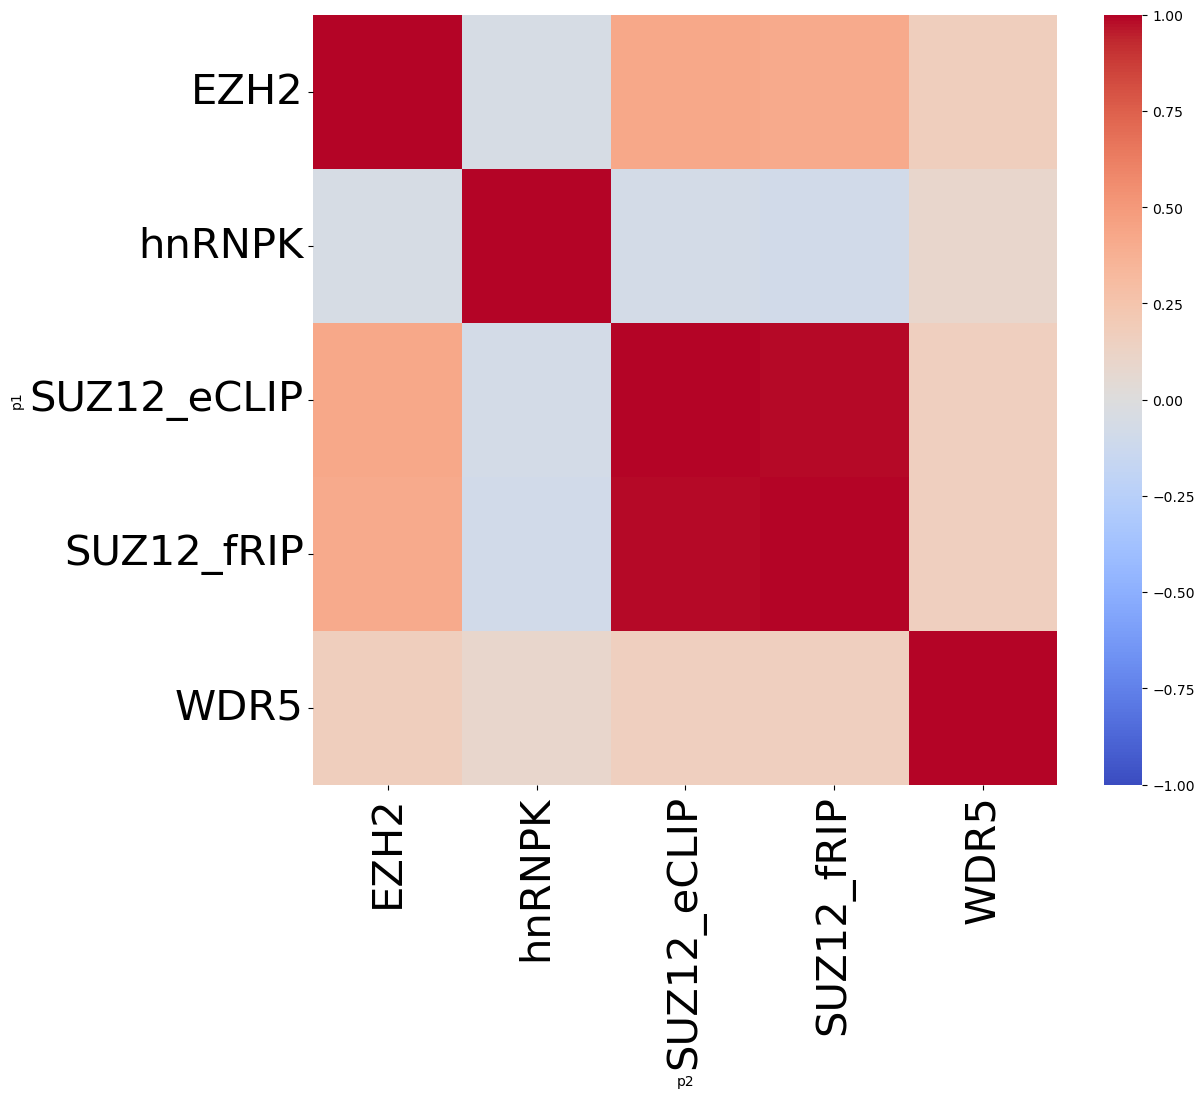

In [32]:
draw_hm("SG_analysis/clean_corrs.tsv")